### EDA

In [43]:
#importing libraries
import pandas as pd
df=pd.read_csv('/content/COVIDSenti-A.csv')

In [44]:
df

,tweet,label
0,Coronavirus | Human Coronavirus Types | CDC ht...,neu
1,"@shehryar_taseer That‚Äôs üíØ true , \nCorona...",neu
2,"TLDR: Not SARS, possibly new coronavirus. Diff...",neg
3,Disease outbreak news from the WHO: Middle Eas...,neu
4,China - Media: WSJ says sources tell them myst...,neu
...,...,...
29995,CDC: Re-test confirms Westerdam cruise ship pa...,neu
29996,Two doctors die of coronavirus within 24 hours...,neu
29997,BEIJING - The lockdown of Guo Jing's neighbour...,neu
29998,#CoronavirusOutbreak in #Balochistan !!\n#CPEC...,neu


In [45]:
df.shape

(30000, 2)

In [46]:
#removing duplicates
df.duplicated().sum()

13

In [47]:
df.drop_duplicates(inplace=True)

In [48]:
df.shape

(29987, 2)

In [49]:
df.isnull().sum()

tweet    0
label    0
dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


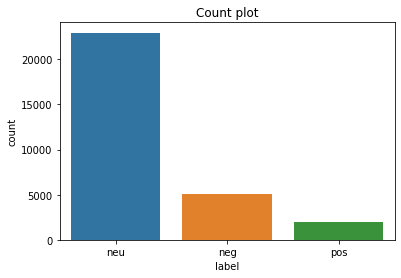

In [50]:
#Visualizing data
import matplotlib.pyplot as plt
import seaborn as sns
plt.title('Count plot')
sns.countplot(df['label'])

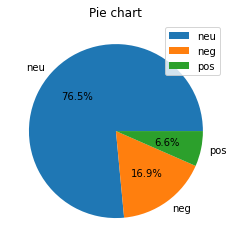

In [51]:
plt.title('Pie chart')
plt.pie(df['label'].value_counts(),labels=set(df['label']),autopct='%1.1f%%')
plt.legend()
plt.show()

### Preprocessing data

In [52]:
!pip install unidecode
import nltk
nltk.download('stopwords')
nltk.download('punkt')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [53]:
#preprocesssing
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from unidecode import unidecode
import re
stop_words = set(stopwords.words('english'))
stop_words.add('https')
for i in df.index:
  #print(df['tweet'][i])
  df['tweet'][i]=re.sub('[@#&?-?><=!`\-:,()|]',' ',df['tweet'][i])
  word_tokens = word_tokenize(df['tweet'][i])
  filtered_sentence = [w.lower() for w in word_tokens if not w.lower() in stop_words and not (w.startswith('https://') or w.startswith('//') )]
  filtered_sentence=[unidecode(w) for w in filtered_sentence]
  df['tweet'][i]=(' '.join(filtered_sentence))


In [54]:
df.shape

(29987, 2)

In [55]:
df

,tweet,label
0,coronavirus human coronavirus types cdc,neu
1,"shehryar_taseer that,aos uio true corona virus...",neu
2,tldr sars possibly new coronavirus . difficult...,neg
3,disease outbreak news middle east respiratory ...,neu
4,china media wsj says sources tell mystery pneu...,neu
...,...,...
29995,cdc test confirms westerdam cruise ship passen...,neu
29996,two doctors die coronavirus within 24 hours ch...,neu
29997,beijing lockdown guo jing 's neighbourhood wuh...,neu
29998,coronavirusoutbreak balochistan cpec route spr...,neu


In [56]:
X=df['tweet']

In [57]:
y=df['label']

### Implementing SVC

In [58]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=87)

In [59]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer()
train_vectors = vectorizer.fit_transform(x_train)
test_vectors = vectorizer.transform(x_test)


In [60]:
#linear kernel
from sklearn import svm
clas=svm.SVC(kernel='linear')
clas.fit(train_vectors,y_train)
pred=clas.predict(test_vectors)
from sklearn import metrics
metrics.accuracy_score(y_test,pred)

0.8871290430143381

In [61]:
# rbf kernel
classifier = svm.SVC(kernel = 'rbf')
classifier.fit(train_vectors, y_train)
pred1=classifier.predict(test_vectors)
metrics.accuracy_score(y_test,pred1)

0.8599533177725909

In [62]:
#ploynomial kernel
classifier2 = svm.SVC(kernel = 'poly')
classifier2.fit(train_vectors, y_train)
pred2=classifier2.predict(test_vectors)
metrics.accuracy_score(y_test,pred2)

0.7902634211403802

In [63]:
#sigmoid kernel
classifier3 = svm.SVC(kernel = 'sigmoid')
classifier3.fit(train_vectors, y_train)
pred3=classifier3.predict(test_vectors)
metrics.accuracy_score(y_test,pred3)

0.8807935978659553

### Accuracy

In [64]:
kernels=['linear','rbf','ploy','sigmoid']
val=[float(format(metrics.accuracy_score(y_test,pred),'.2f')),float(format(metrics.accuracy_score(y_test,pred1),'.2f')),float(format(metrics.accuracy_score(y_test,pred2),'.2f')),float(format(metrics.accuracy_score(y_test,pred3),'.2f'))]

In [65]:
df = pd.DataFrame(list(zip(kernels, val)),columns =['Kernals', 'Accuracy'])
df

,Kernals,Accuracy
0,linear,0.89
1,rbf,0.86
2,ploy,0.79
3,sigmoid,0.88


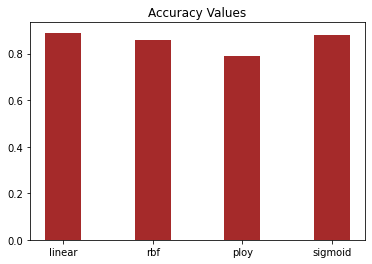

In [66]:
plt.title('Accuracy Values')
plt.bar(kernels, val, color ='brown', width = 0.4)
plt.show()